# DA_2팀_유신의 작업

In [43]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
import seaborn

In [44]:
palette = seaborn.color_palette('YlGn')

In [45]:
warnings.filterwarnings(action='ignore')

In [46]:
pip install koreanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기

In [48]:
df = pd.read_csv('./data/따릉이고장신고/서울시 공공자전거 고장신고 내역_23.1-6.csv', encoding='cp949')
df

,자전거번호,등록일시,구분
0,SPB-62819,2023-01-01 0:01,안장
1,SPB-62819,2023-01-01 0:01,페달
2,SPB-32382,2023-01-01 0:24,타이어
3,SPB-81126,2023-01-01 1:20,단말기
4,SPB-45763,2023-01-01 1:49,체인
...,...,...,...
83729,SPB-33647,2023-06-30 23:38,기타
83730,SPB-41454,2023-06-30 23:51,체인
83731,SPB-48643,2023-06-30 23:53,체인
83732,SPB-52223,2023-06-30 23:56,기타


In [49]:
df2 = pd.read_csv('./data/따릉이고장신고/서울시 공공자전거 고장신고 내역_23.7-10.csv', encoding='cp949')
df2

,자전거번호,등록일시,고장구분
0,SPB-49493,2023-07-01 00:02:28,기타
1,SPB-34078,2023-07-01 00:08:20,기타
2,SPB-65202,2023-07-01 00:13:55,타이어
3,SPB-62031,2023-07-01 00:14:27,타이어
4,SPB-37479,2023-07-01 00:21:21,타이어
...,...,...,...
67323,SPB-38802,2023-10-31 23:29:55,타이어
67324,SPB-35673,2023-10-31 23:34:17,타이어
67325,SPB-44079,2023-10-31 23:42:26,체인
67326,SPB-67068,2023-10-31 23:44:42,단말기


In [50]:
df3 = pd.read_csv('./data/따릉이고장신고/서울시 공공자전거 고장신고 내역_23.11-12.csv', encoding='cp949')
df3

,자전거번호,등록일시,고장구분
0,SPB-67589,2023-11-01 00:00:50,타이어
1,SPB-55524,2023-11-01 00:03:42,단말기
2,SPB-55524,2023-11-01 00:03:42,기타
3,SPB-34203,2023-11-01 00:04:17,단말기
4,SPB-31667,2023-11-01 00:12:11,타이어
...,...,...,...
21846,SPB-60450,2023-12-31 23:00:11,체인
21847,SPB-30500,2023-12-31 23:29:38,안장
21848,SPB-30500,2023-12-31 23:29:38,기타
21849,SPB-30224,2023-12-31 23:49:38,체인


### 3개의 데이터셋 결합으로 통합된 데이터셋 구성

In [52]:
# 컬럼명 일치화 작업
df.rename(columns={'구분' : '고장구분'}, inplace=True)

In [53]:
results_df = pd.concat([df, df2, df3], ignore_index=True)

In [54]:
results_df.to_csv('./data/newdata/results.csv')

In [55]:
diy_wea_df = pd.read_csv('./data/따릉이고장신고/diy_wea_df.csv')

## EDA 데이터 전처리
- 공공 자전거 고장 신고 데이터를 1년 단위로 병합
- 1~6월 데이터의 고장 구분 컬럼이 타 데이터셋과 구분 -> 고장구분으로 수정

In [57]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172913 entries, 0 to 172912
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   172913 non-null  object
 1   등록일시    172913 non-null  object
 2   고장구분    172913 non-null  object
dtypes: object(3)
memory usage: 4.0+ MB


### 결측치 확인
고장신고 데이터_1년단위 데이터셋에 결측치는 없음

In [59]:
results_df.isna().sum()

자전거번호    0
등록일시     0
고장구분     0
dtype: int64

### 이상치 확인 
고장신고 데이터_1년단위 데이터셋은 범주형와 날짜 데이터로 구성되어 있기에 이상치는 존재하지 않음

## 데이터 둘러보기

가장 고장이 많은 부품은 1. 기타, 2. 타이어, 3. 체인, 4. 안장 순이다. 
1. 기타구분는 묶어서 관리하여 상세한 고장 구분을 알기가 어렵다
   - 서울시 공공자전거 고장신고 내역 관리자의 답변을 참고하였다.

In [63]:
brk_df = results_df.groupby('고장구분').agg('count')['자전거번호'].sort_values().to_frame().T
brk_df

고장구분,단말기,페달,안장,체인,타이어,기타
자전거번호,7925,17795,31693,32977,33025,49498


- ## 한눈에 보기 좋게 시각화

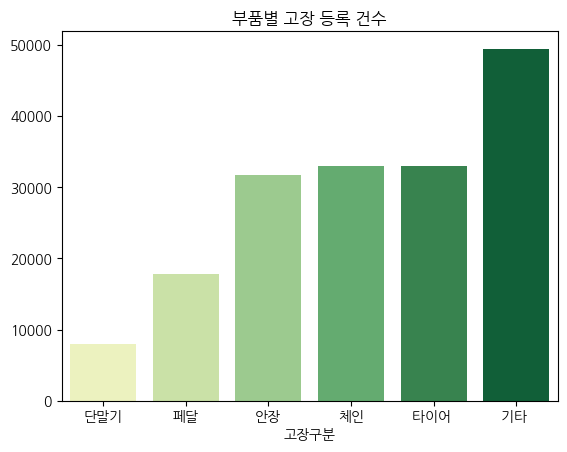

In [65]:
sns.barplot(data=brk_df, palette=palette)
plt.title('부품별 고장 등록 건수')
plt.show()

---

## 어떤 계절에 고장률이 높을까?
자전거 고장 원인은 내외부로 다양하겠지만 계절에 따른 고장도 무시할 수 없다.    
월별 신고건수를 파악하여 시각화 해보자

In [69]:
results_df

,자전거번호,등록일시,고장구분
0,SPB-62819,2023-01-01 0:01,안장
1,SPB-62819,2023-01-01 0:01,페달
2,SPB-32382,2023-01-01 0:24,타이어
3,SPB-81126,2023-01-01 1:20,단말기
4,SPB-45763,2023-01-01 1:49,체인
...,...,...,...
172908,SPB-60450,2023-12-31 23:00:11,체인
172909,SPB-30500,2023-12-31 23:29:38,안장
172910,SPB-30500,2023-12-31 23:29:38,기타
172911,SPB-30224,2023-12-31 23:49:38,체인


In [70]:
month_df = results_df.copy()

In [71]:
month_df['월별'] = pd.to_datetime(month_df['등록일시'].str.split(' ').str[0]).dt.month
month_df

,자전거번호,등록일시,고장구분,월별
0,SPB-62819,2023-01-01 0:01,안장,1
1,SPB-62819,2023-01-01 0:01,페달,1
2,SPB-32382,2023-01-01 0:24,타이어,1
3,SPB-81126,2023-01-01 1:20,단말기,1
4,SPB-45763,2023-01-01 1:49,체인,1
...,...,...,...,...
172908,SPB-60450,2023-12-31 23:00:11,체인,12
172909,SPB-30500,2023-12-31 23:29:38,안장,12
172910,SPB-30500,2023-12-31 23:29:38,기타,12
172911,SPB-30224,2023-12-31 23:49:38,체인,12


In [72]:
month_df = month_df.groupby(['월별', '고장구분']).size().reset_index()
month_df.rename(columns={0:'고장건수'}, inplace=True)
month_df

,월별,고장구분,고장건수
0,1,기타,3745
1,1,단말기,410
2,1,안장,1262
3,1,체인,1656
4,1,타이어,993
...,...,...,...
67,12,단말기,354
68,12,안장,1827
69,12,체인,1662
70,12,타이어,1212


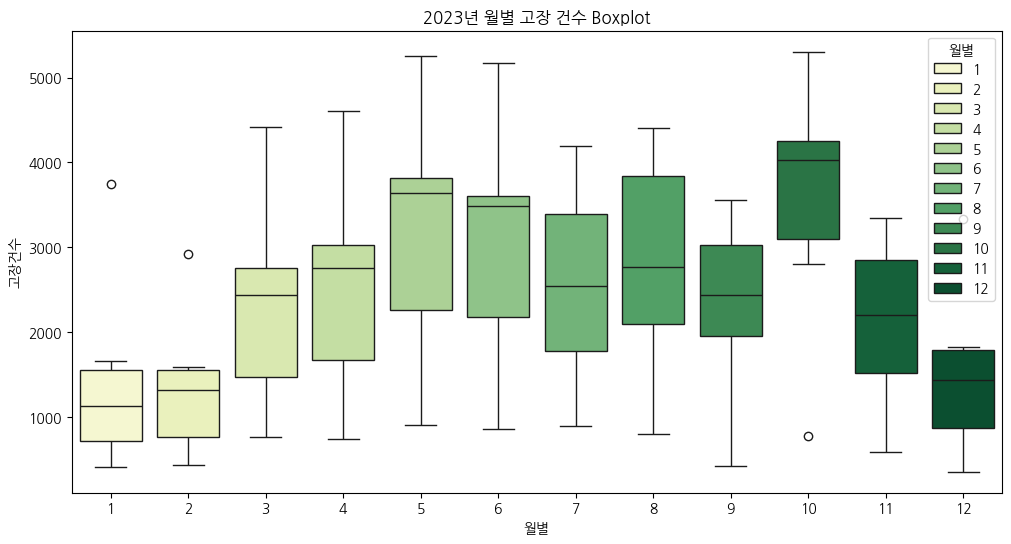

In [73]:
plt.figure(figsize=(12, 6))
palette = seaborn.color_palette('YlGn', 12)
sns.boxplot(data=month_df, x='월별', y='고장건수', hue='월별', palette=palette)
plt.title('2023년 월별 고장 건수 Boxplot')
plt.show()

따릉이 고장신고 건수는 월 별로 시각화 했을때 10월에 가장 많은 고장신고가 발생했음을 알 수 있다.    
왜? 10월에 고장률이 높을까? 

---

## 날씨 데이터 불러오기

In [77]:
mon_wea_df = pd.read_csv('./data/따릉이고장신고/23년 월별 날씨 데이터.csv', encoding='cp949')
mon_wea_df.tail(4)

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균상대습도(%),월합강수량(00~24h만)(mm),평균지면온도(°C)
8,108,서울,2023-09,23.7,27.6,20.2,32.8,15.2,74,134.5,25.4
9,108,서울,2023-10,15.8,21.0,11.5,24.6,5.4,67,31.0,16.1
10,108,서울,2023-11,6.8,11.5,2.9,25.9,-7.3,65,81.9,7.0
11,108,서울,2023-12,1.1,5.2,-2.5,16.8,-14.7,69,85.9,1.0


In [78]:
diy_wea_df = pd.read_csv('./data/따릉이고장신고/diy_wea_df.csv')
diy_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           365 non-null    int64  
 1   지점명          365 non-null    object 
 2   일시           365 non-null    object 
 3   평균기온(°C)     365 non-null    float64
 4   최저기온(°C)     365 non-null    float64
 5   최고기온(°C)     365 non-null    float64
 6   일강수량(mm)     150 non-null    float64
 7   평균 상대습도(%)   365 non-null    float64
 8   일 최심신적설(cm)  9 non-null      float64
 9   일 최심적설(cm)   16 non-null     float64
 10  평균 지면온도(°C)  365 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 31.5+ KB


In [79]:
dummy_df = results_df.copy()
dummy_df['등록일시'] = pd.to_datetime(dummy_df['등록일시'].str.split(' ').str[0])

In [80]:
dummy_df = dummy_df.set_index('등록일시')

In [81]:
diy_brk_df = dummy_df.groupby(['고장구분']).resample("D").size().unstack().T
diy_brk_df

고장구분,기타,단말기,안장,체인,타이어,페달
등록일시,,,,,,
2023-01-01,39,10,27,26,18,9
2023-01-02,147,15,51,64,46,26
2023-01-03,152,12,45,65,44,33
2023-01-04,110,12,62,57,42,20
2023-01-05,128,15,65,62,37,22
...,...,...,...,...,...,...
2023-12-27,122,12,81,58,50,25
2023-12-28,86,9,78,46,51,34
2023-12-29,77,15,69,42,34,18


In [82]:
brk_df = results_df.groupby('고장구분').agg('count')['자전거번호'].sort_values().to_frame()
brk_df

,자전거번호
고장구분,
단말기,7925
페달,17795
안장,31693
체인,32977
타이어,33025
기타,49498


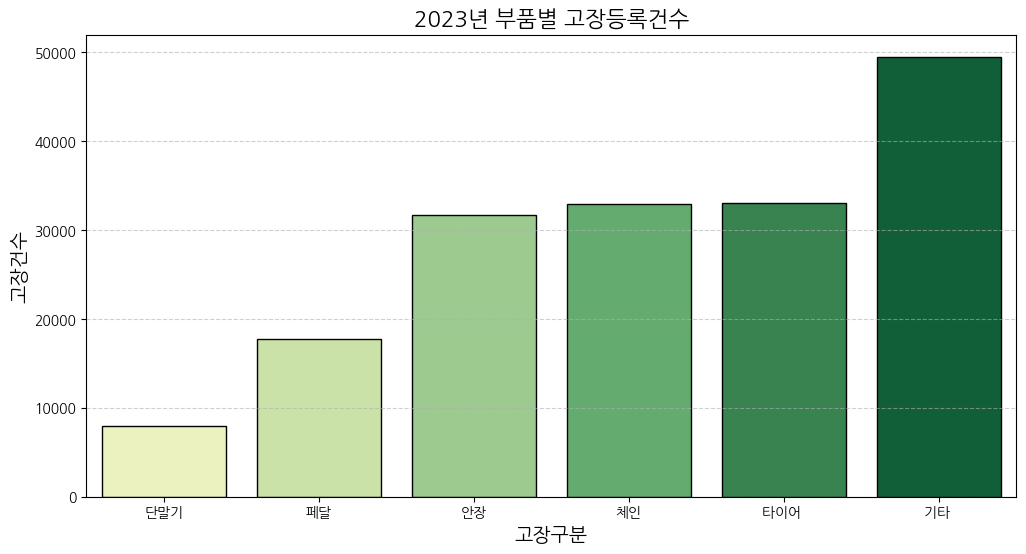

In [83]:
palette = seaborn.color_palette('YlGn')
plt.figure(figsize=(12, 6))
sns.barplot(data=brk_df, x='고장구분', y='자전거번호', 
            palette=palette, edgecolor = 'black')  # 색상 적용
plt.title('2023년 부품별 고장등록건수', fontsize=16)
plt.xlabel('고장구분', fontsize=14)
plt.ylabel('고장건수', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [84]:
diy_wea_df['일시']= pd.to_datetime(diy_wea_df['일시'])
diy_brk_wea_df = pd.merge(diy_wea_df, diy_brk_df, left_on = '일시', right_on='등록일시')

In [85]:
diy_brk_wea_df.drop(columns='지점', inplace=True)

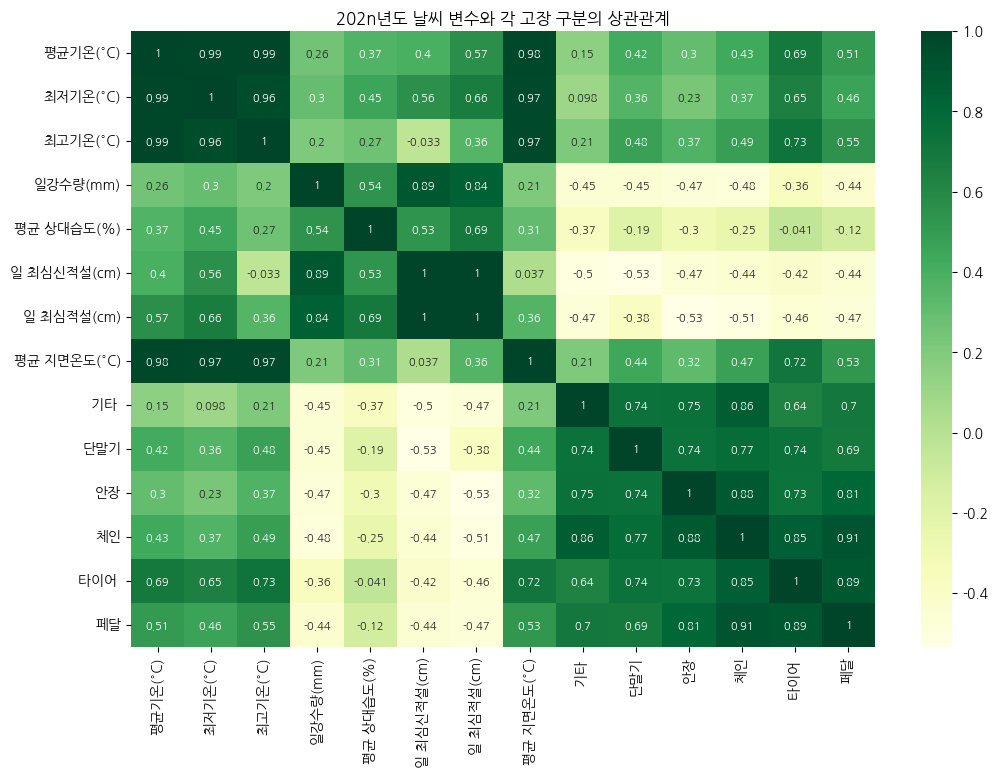

In [86]:
plt.figure(figsize=(12, 8))
plt.title('202n년도 날씨 변수와 각 고장 구분의 상관관계')
sns.heatmap(
    cmap = 'YlGn',
    data = diy_brk_wea_df.corr(numeric_only=True),
    annot = True,
    annot_kws={'size': 8},
    
)
plt.show()

상관계수를 통해 고장부품 중 타이어가 평균기온, 최저기온, 최고기온, 평균 지면온도와 상관관계가 높을 것을 확인할 수 있다.

#### -> 10월에 가장 고장 건수가 많은데 왜? 기온이 높을 때 고장이 잘나는 타이어가 상관관계가 높을까?
- 10월은 폭염도 아니고 8~9월에 비해 온도도 낮을 텐데 왜 고장건수가 더 많을까? 각 고장구분 별로 월별 고장건수를
  시각화 해보자!

---

In [89]:
diy_brk_wea_df.columns

Index(['지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)',
       '평균 상대습도(%)', '일 최심신적설(cm)', '일 최심적설(cm)', '평균 지면온도(°C)', '기타 ', '단말기',
       '안장', '체인', '타이어 ', '페달'],
      dtype='object')

In [90]:
diy_brk_wea_df.isna().sum().to_frame().T

,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 상대습도(%),일 최심신적설(cm),일 최심적설(cm),평균 지면온도(°C),기타,단말기,안장,체인,타이어,페달
0,0,0,0,0,0,215,0,356,349,0,0,0,0,0,0,0


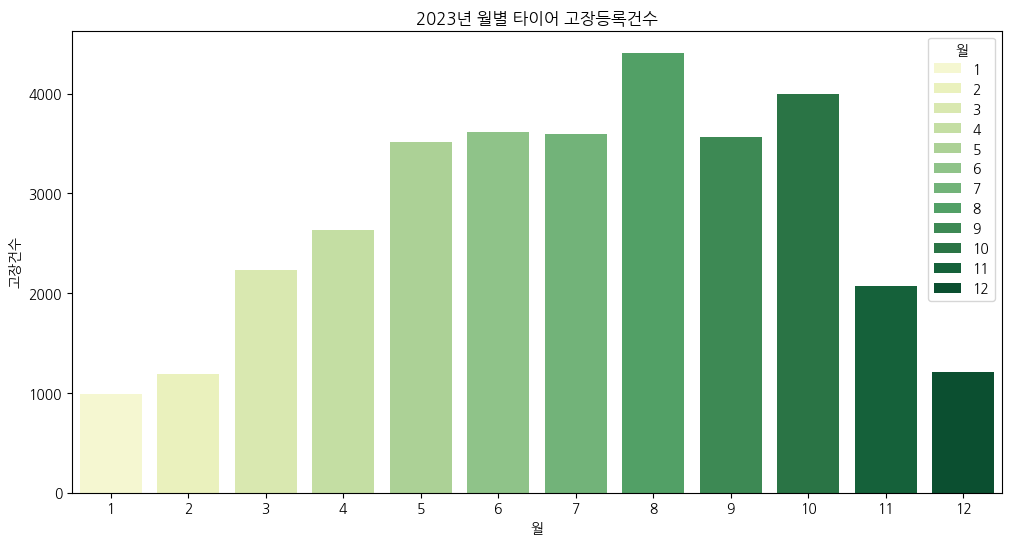

In [91]:
palette = seaborn.color_palette('YlGn', 12)
tire_df = month_df[month_df['고장구분'] == '타이어 ']

plt.figure(figsize=(12, 6))
sns.barplot(data=tire_df, x='월별', y='고장건수', palette=palette, hue='월별')
plt.legend(title='월')
plt.xlabel('월')
plt.title('2023년 월별 타이어 고장등록건수')
plt.show()

전체 고장 건수는 23년 10월에 가장 많지만 타이어 고장의 겨우 23년 8월에 가장 많았다.    
상관관계를 보았을때 타이어는 온도와 가장 밀접한 관계를 가지는 것으로 판단된다.   
8월은 여름 중 가장 더운달이다. 이것과 관련이 있는지 확인하고자 한다

In [93]:
diy_brk_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지점명          365 non-null    object        
 1   일시           365 non-null    datetime64[ns]
 2   평균기온(°C)     365 non-null    float64       
 3   최저기온(°C)     365 non-null    float64       
 4   최고기온(°C)     365 non-null    float64       
 5   일강수량(mm)     150 non-null    float64       
 6   평균 상대습도(%)   365 non-null    float64       
 7   일 최심신적설(cm)  9 non-null      float64       
 8   일 최심적설(cm)   16 non-null     float64       
 9   평균 지면온도(°C)  365 non-null    float64       
 10  기타           365 non-null    int64         
 11  단말기          365 non-null    int64         
 12  안장           365 non-null    int64         
 13  체인           365 non-null    int64         
 14  타이어          365 non-null    int64         
 15  페달           365 non-null    int64         
dtypes: datet

In [94]:
diy_brk_wea_df['폭염유무'] = False

In [95]:
diy_brk_wea_df.loc[diy_brk_wea_df['최고기온(°C)'] >= 33.0, '폭염유무'] = True

In [96]:
list(diy_brk_wea_df.columns)

['지점명',
 '일시',
 '평균기온(°C)',
 '최저기온(°C)',
 '최고기온(°C)',
 '일강수량(mm)',
 '평균 상대습도(%)',
 '일 최심신적설(cm)',
 '일 최심적설(cm)',
 '평균 지면온도(°C)',
 '기타 ',
 '단말기',
 '안장',
 '체인',
 '타이어 ',
 '페달',
 '폭염유무']

In [97]:
diy_brk_wea_df['총고장건수'] = diy_brk_wea_df[['기타 ', '단말기', '안장', '체인', '타이어 ', '페달']].sum(axis=1)

In [98]:
diy_brk_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   지점명          365 non-null    object        
 1   일시           365 non-null    datetime64[ns]
 2   평균기온(°C)     365 non-null    float64       
 3   최저기온(°C)     365 non-null    float64       
 4   최고기온(°C)     365 non-null    float64       
 5   일강수량(mm)     150 non-null    float64       
 6   평균 상대습도(%)   365 non-null    float64       
 7   일 최심신적설(cm)  9 non-null      float64       
 8   일 최심적설(cm)   16 non-null     float64       
 9   평균 지면온도(°C)  365 non-null    float64       
 10  기타           365 non-null    int64         
 11  단말기          365 non-null    int64         
 12  안장           365 non-null    int64         
 13  체인           365 non-null    int64         
 14  타이어          365 non-null    int64         
 15  페달           365 non-null    int64         
 16  폭염유무    

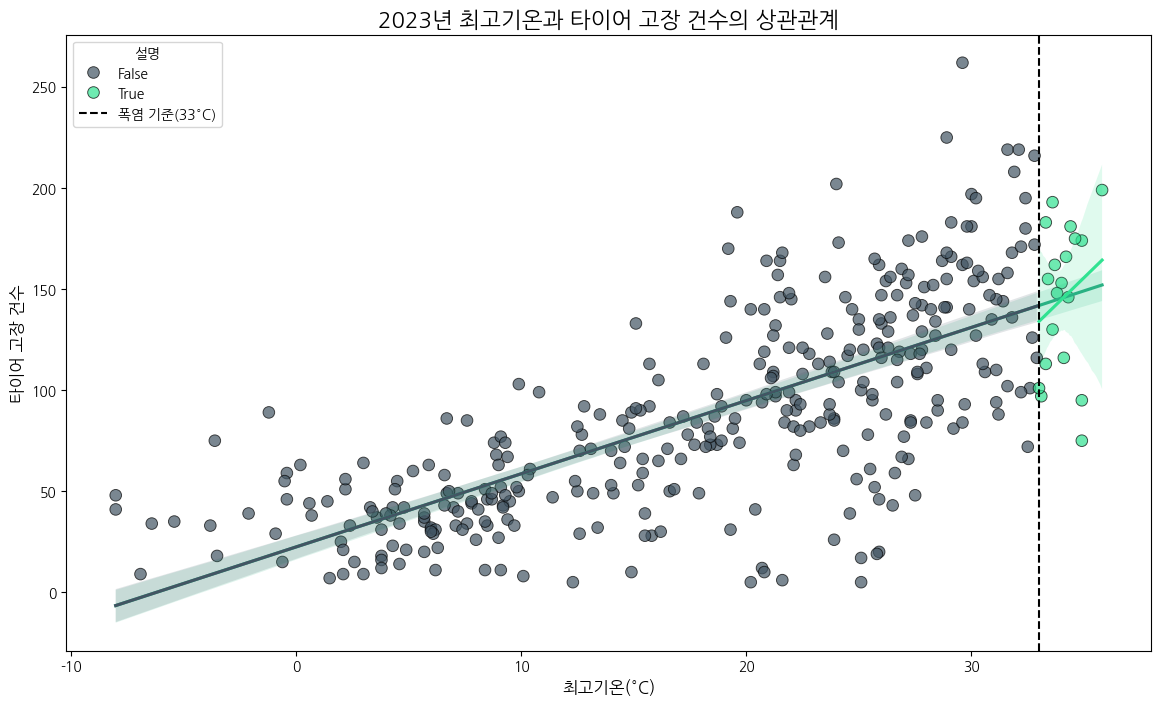

In [99]:
palette = {True: '#30e291', False: '#425563'}  # 폭염: 연한 초록, 비폭염: 진한 초록

plt.figure(figsize=(14, 8))
sns.scatterplot(data=diy_brk_wea_df, x='최고기온(°C)', y='타이어 ', hue='폭염유무',
                palette=palette, s=70, alpha=0.7, edgecolor='k')

sns.regplot(data=diy_brk_wea_df, 
            x='최고기온(°C)', 
            y='타이어 ', 
            scatter=False,
            color='#29b183', line_kws={'label': '전체 경향선'}
           )

sns.regplot(data=diy_brk_wea_df[diy_brk_wea_df['폭염유무'] == True], 
            x='최고기온(°C)', 
            y='타이어 ',
            scatter=False, 
            color='#30e291', 
            line_kws={'label': '폭염 경향선'})

sns.regplot(data=diy_brk_wea_df[diy_brk_wea_df['폭염유무'] == False], 
            x='최고기온(°C)',
            y='타이어 ',
            scatter=False, 
            color='#425563', 
            line_kws={'label': '비폭염 경향선'}
           )

plt.title('2023년 최고기온과 타이어 고장 건수의 상관관계', fontsize=16)
plt.xlabel('최고기온(°C)', fontsize=12)
plt.ylabel('타이어 고장 건수', fontsize=12)

plt.axvline(x=33, color='black', linestyle='--', label='폭염 기준(33°C)')

handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # 중복 레이블 제거
plt.legend(unique_labels.values(), unique_labels.keys(), title='설명', loc='upper left')
plt.show()

해당 시각화를 통해 알 수 있는 2가지 인사이트는   
- 타이어 고장은 기온이 20°C 이상부터 많아짐을 확인할 수 있다.
- 폭염이 있는 날에는 기본적으로 고장신고 

In [101]:
diy_brk_wea_df[diy_brk_wea_df['폭염유무'] == True].count()

지점명            19
일시             19
평균기온(°C)       19
최저기온(°C)       19
최고기온(°C)       19
일강수량(mm)        5
평균 상대습도(%)     19
일 최심신적설(cm)     0
일 최심적설(cm)      0
평균 지면온도(°C)    19
기타             19
단말기            19
안장             19
체인             19
타이어            19
페달             19
폭염유무           19
총고장건수          19
dtype: int64

In [102]:
import statsmodels.api as sm

x_data = diy_brk_wea_df[['평균기온(°C)', '최고기온(°C)', '평균 지면온도(°C)']]
target = diy_brk_wea_df[['타이어 ']]

In [103]:
#(다중회기분석)OLS 검정 

multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   타이어    R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              1021.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                   3.48e-176
Time:                        13:10:47   Log-Likelihood:                         -1804.1
No. Observations:                 365   AIC:                                      3614.
Df Residuals:                     362   BIC:                                      3626.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
평균기온(°C)       -7.5739      0.974     -7.774      0.000      -9.490      -5.658
최고기온(°C)        8.0685      0.525     15.358      0.000       7.035       9.102
평균 지면온도(°C)     2.9696      0.799      3.719      0.000       1.399       4.540
==============================================================================
Omnibus:                        7.672   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.548
Skew:                           0.246   Prob(JB):                       0.0139
Kurtosis:                       3.565   Cond. No.                         22.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
from scipy import stats

In [105]:
t, p = stats.ttest_ind(diy_brk_wea_df['타이어 '], diy_brk_wea_df['폭염유무'])
t, p 

(33.274904090617945, 2.5910086678124174e-148)

### 결론
- 타이어와 기온과의 연관성이 있다는 인사이트를 얻을 수 있음
- 폭염은 표본의 크기가 작아 신뢰성이 낮음

---